<a href="https://colab.research.google.com/github/HillaryNartey/PyData-training-final-project/blob/main/Project2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [32]:
!pip install us

In [1]:
from google.colab import files
uploaded = files.upload()

Saving PA_singlestate_timeseries.xlsx to PA_singlestate_timeseries.xlsx


In [33]:
import pandas as pd 
import io
import us
import datetime as dt

df2 = pd.read_excel(io.BytesIO(uploaded['PA_singlestate_timeseries.xlsx']))

In [3]:
df2.head()

,date,country,state,county,fips,lat,long,locationId,actuals.cases,actuals.deaths,...,metrics.infectionRate,metrics.infectionRateCI90,metrics.icuHeadroomRatio,metrics.icuHeadroomDetails,metrics.icuCapacityRatio,riskLevels.overall,metrics.vaccinationsInitiatedRatio,metrics.vaccinationsCompletedRatio,actuals.newDeaths,actuals.vaccinesAdministered
0,2020-03-02,US,PA,NaN,42,NaN,NaN,iso1:us#iso2:us-pa,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN
1,2020-03-03,US,PA,NaN,42,NaN,NaN,iso1:us#iso2:us-pa,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN
2,2020-03-04,US,PA,NaN,42,NaN,NaN,iso1:us#iso2:us-pa,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN
3,2020-03-05,US,PA,NaN,42,NaN,NaN,iso1:us#iso2:us-pa,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN
4,2020-03-06,US,PA,NaN,42,NaN,NaN,iso1:us#iso2:us-pa,2.0,0.0,...,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN


In [4]:
len(df2) #lenght of the dataset

501

In [5]:
df2.shape

(501, 39)

In [6]:
df2.tail()

,date,country,state,county,fips,lat,long,locationId,actuals.cases,actuals.deaths,...,metrics.infectionRate,metrics.infectionRateCI90,metrics.icuHeadroomRatio,metrics.icuHeadroomDetails,metrics.icuCapacityRatio,riskLevels.overall,metrics.vaccinationsInitiatedRatio,metrics.vaccinationsCompletedRatio,actuals.newDeaths,actuals.vaccinesAdministered
496,2021-06-21,US,PA,NaN,42,NaN,NaN,iso1:us#iso2:us-pa,1215116.0,27623.0,...,0.68,0.12,NaN,NaN,NaN,1,0.619,0.485,2.0,13631788.0
497,2021-06-22,US,PA,NaN,42,NaN,NaN,iso1:us#iso2:us-pa,1215239.0,27655.0,...,0.68,0.14,NaN,NaN,NaN,1,0.620,0.486,32.0,13651077.0
498,2021-06-23,US,PA,NaN,42,NaN,NaN,iso1:us#iso2:us-pa,1215374.0,27662.0,...,0.67,0.16,NaN,NaN,NaN,1,0.621,0.487,7.0,13679110.0
499,2021-06-24,US,PA,NaN,42,NaN,NaN,iso1:us#iso2:us-pa,1215735.0,27675.0,...,0.67,0.18,NaN,NaN,NaN,1,0.622,0.489,13.0,13715484.0
500,2021-06-25,US,PA,NaN,42,NaN,NaN,iso1:us#iso2:us-pa,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN


In [7]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 501 entries, 0 to 500
Data columns (total 39 columns):
 #   Column                                  Non-Null Count  Dtype         
---  ------                                  --------------  -----         
 0   date                                    501 non-null    datetime64[ns]
 1   country                                 501 non-null    object        
 2   state                                   501 non-null    object        
 3   county                                  0 non-null      float64       
 4   fips                                    501 non-null    int64         
 5   lat                                     0 non-null      float64       
 6   long                                    0 non-null      float64       
 7   locationId                              501 non-null    object        
 8   actuals.cases                           492 non-null    float64       
 9   actuals.deaths                          492 non-null  

In [8]:
df2.describe()

,county,fips,lat,long,actuals.cases,actuals.deaths,actuals.positiveTests,actuals.negativeTests,actuals.hospitalBeds.capacity,actuals.hospitalBeds.currentUsageTotal,...,metrics.infectionRate,metrics.infectionRateCI90,metrics.icuHeadroomRatio,metrics.icuHeadroomDetails,metrics.icuCapacityRatio,riskLevels.overall,metrics.vaccinationsInitiatedRatio,metrics.vaccinationsCompletedRatio,actuals.newDeaths,actuals.vaccinesAdministered
count,0.0,501.0,0.0,0.0,4.920000e+02,492.000000,4.960000e+02,4.980000e+02,0.0,302.000000,...,488.000000,488.000000,302.000000,0.0,302.000000,501.000000,156.000000,156.000000,489.000000,1.560000e+02
mean,NaN,42.0,NaN,NaN,4.610324e+05,12899.796748,4.984688e+05,5.395527e+06,NaN,25574.609272,...,1.043217,0.111865,0.364834,NaN,0.783377,1.922156,0.345308,0.222532,56.905930,7.047403e+06
std,NaN,0.0,NaN,NaN,4.402533e+05,9208.187981,4.503788e+05,4.734033e+06,NaN,1712.532400,...,0.265452,0.067447,0.156075,NaN,0.034572,1.069546,0.202455,0.166312,71.124741,4.508568e+06
min,NaN,42.0,NaN,NaN,2.000000e+00,0.000000,1.000000e+00,9.000000e+00,NaN,21074.000000,...,0.670000,0.100000,0.090000,NaN,0.680000,0.000000,0.028000,0.004000,0.000000,4.104140e+05
25%,NaN,42.0,NaN,NaN,9.170450e+04,6701.750000,1.169840e+05,8.947250e+05,NaN,24286.500000,...,0.890000,0.100000,0.242500,NaN,0.760000,1.000000,0.144750,0.062000,13.000000,2.647661e+06
50%,NaN,42.0,NaN,NaN,1.923740e+05,8644.500000,2.400670e+05,3.855450e+06,NaN,25433.500000,...,1.000000,0.100000,0.330000,NaN,0.790000,2.000000,0.354000,0.191500,31.000000,6.810884e+06
75%,NaN,42.0,NaN,NaN,9.186368e+05,23644.250000,9.789840e+05,9.809940e+06,NaN,26694.500000,...,1.110000,0.100000,0.477500,NaN,0.810000,3.000000,0.543000,0.387250,70.000000,1.148192e+07
max,NaN,42.0,NaN,NaN,1.215735e+06,27675.000000,1.247507e+06,1.397632e+07,NaN,30121.000000,...,2.120000,0.840000,0.670000,NaN,0.850000,5.000000,0.622000,0.489000,401.000000,1.371548e+07


In [9]:
import numpy as np


    ** OVERVIEW OF THE DATASET**
   GENERAL DESCRIPTION
   
COVID-related data of the citizens of the United States(US), specifically the people of Pennyslvania.This data spans over a period of 1 year 3 months (i.e. from March 2020 to June 2021). It gives an insight of daily recorded COVID cases, deaths, vaccination completion ration, infection rate, vaccine distributed etc.

In [10]:
#DUPLICATE ENTRIES
#change to dataframe
dup_entries = df2.duplicated().to_frame
dup_entries

<bound method Series.to_frame of 0      False
1      False
2      False
3      False
4      False
       ...  
496    False
497    False
498    False
499    False
500    False
Length: 501, dtype: bool>

In [11]:
df2.duplicated().value_counts()

False    481
True      20
dtype: int64

In [12]:
#COVID data recorded on 16th June,2021
df3 = df2.loc[df2['date']=='2021-06-16']
df3

,date,country,state,county,fips,lat,long,locationId,actuals.cases,actuals.deaths,...,metrics.infectionRate,metrics.infectionRateCI90,metrics.icuHeadroomRatio,metrics.icuHeadroomDetails,metrics.icuCapacityRatio,riskLevels.overall,metrics.vaccinationsInitiatedRatio,metrics.vaccinationsCompletedRatio,actuals.newDeaths,actuals.vaccinesAdministered
491,2021-06-16,US,PA,NaN,42,NaN,NaN,iso1:us#iso2:us-pa,1214051.0,27582.0,...,0.7,0.1,0.1,NaN,0.73,1,0.611,0.472,16.0,13366581.0


In [13]:
df3 = df2.loc[df2['date']=='2021-06-16']['state']
df3

491    PA
Name: state, dtype: object

In [105]:
state = df2.loc[df2['date']=='2021-06-16']['state']
state = state.values[0]
# state = us.states.state.name
state


'PA'

In [66]:
newCases = df2.loc[df2['date']=='2021-06-16']['actuals.newCases']
newCases = newCases.values[0]
newCases

279.0

In [67]:
newDeaths = df2.loc[df2['date']=='2021-06-16']['actuals.newDeaths']
newDeaths = newDeaths.values[0]
newDeaths

16.0

In [17]:
cases = df2.loc[df2['date']=='2021-06-16']['actuals.cases']

In [68]:
#cummulative confirmed or suspected cases 
cumulative_confirmed_cases = cases + newCases
cumulative_confirmed_cases = cumulative_confirmed_cases.values[0]
cumulative_confirmed_cases

1214330.0

In [19]:
df2.loc[df2['date']=='2021-06-16']['actuals.deaths']

491    27582.0
Name: actuals.deaths, dtype: float64

In [20]:
deaths = df2.loc[df2['date']=='2021-06-16']['actuals.deaths']

In [70]:
#Cumulative deaths that are suspected or confirmed
cummulative_deaths_that_are_suspected = deaths + newDeaths
cummulative_deaths_that_are_suspected = cummulative_deaths_that_are_suspected.values[0]
cummulative_deaths_that_are_suspected

27598.0

**Ratio of population that has completed vaccination.**

In [91]:
vaccinationsCompletedRatio = df2.loc[df2['date']=='2021-06-16']['metrics.vaccinationsCompletedRatio']
vaccinationsCompletedRatio = vaccinationsCompletedRatio.values[0]
vaccinationsCompletedRatio

0.472

**Ratio of population that has initiated vaccination**

In [92]:
vaccinationsInitiatedRatio = df2.loc[df2['date']=='2021-06-16']['metrics.vaccinationsInitiatedRatio']
vaccinationsInitiatedRatio = vaccinationsInitiatedRatio.values[0]
vaccinationsInitiatedRatio

0.611

In [93]:
vaccinationCompleted = df2.loc[df2['date']=='2021-06-16']['actuals.vaccinationsCompleted']
vaccinationCompleted = vaccinationCompleted.values[0]
vaccinationCompleted

6045055.0

In [94]:
vaccinationInitiated =  df2.loc[df2['date']=='2021-06-16']['actuals.vaccinationsInitiated']
vaccinationInitiated = vaccinationInitiated.values[0]
vaccinationInitiated

7818311.0

In [24]:
rolling_dataset = df2.iloc[485:492]
rolling_dataset

,date,country,state,county,fips,lat,long,locationId,actuals.cases,actuals.deaths,...,metrics.infectionRate,metrics.infectionRateCI90,metrics.icuHeadroomRatio,metrics.icuHeadroomDetails,metrics.icuCapacityRatio,riskLevels.overall,metrics.vaccinationsInitiatedRatio,metrics.vaccinationsCompletedRatio,actuals.newDeaths,actuals.vaccinesAdministered
485,2021-06-10,US,PA,NaN,42,NaN,NaN,iso1:us#iso2:us-pa,1212155.0,27493.0,...,0.71,0.1,0.16,NaN,0.75,1,0.601,0.459,21.0,13084043.0
486,2021-06-11,US,PA,NaN,42,NaN,NaN,iso1:us#iso2:us-pa,1212529.0,27510.0,...,0.71,0.1,0.15,NaN,0.73,1,0.603,0.461,17.0,13135306.0
487,2021-06-12,US,PA,NaN,42,NaN,NaN,iso1:us#iso2:us-pa,1212822.0,27526.0,...,0.71,0.1,0.12,NaN,0.70,1,0.606,0.464,16.0,13212289.0
488,2021-06-13,US,PA,NaN,42,NaN,NaN,iso1:us#iso2:us-pa,1213003.0,27540.0,...,0.71,0.1,0.11,NaN,0.68,1,0.608,0.467,14.0,13267983.0
489,2021-06-14,US,PA,NaN,42,NaN,NaN,iso1:us#iso2:us-pa,1213350.0,27543.0,...,0.70,0.1,0.12,NaN,0.73,1,0.609,0.470,3.0,13318101.0
490,2021-06-15,US,PA,NaN,42,NaN,NaN,iso1:us#iso2:us-pa,1213772.0,27566.0,...,0.70,0.1,0.13,NaN,0.77,1,0.611,0.472,23.0,13365625.0
491,2021-06-16,US,PA,NaN,42,NaN,NaN,iso1:us#iso2:us-pa,1214051.0,27582.0,...,0.70,0.1,0.10,NaN,0.73,1,0.611,0.472,16.0,13366581.0


In [25]:
new_rolling_avg = rolling_dataset['actuals.newCases'].mean()
actual_rolling_avg = rolling_dataset['actuals.cases'].mean()
cases_100k = (new_rolling_avg/actual_rolling_avg)*100
rounded_rolling_avg = round(cases_100k, 2)
rounded_rolling_avg

0.03

In [95]:
display = f"""##############################################################

{state}, {'2021-06-16'}

Infection
        - New cases: {newCases}
        - New deaths: {newDeaths}
        - Cummulative cases: {cumulative_confirmed_cases}
        - Cummulative deaths: {cummulative_deaths_that_are_suspected}
        - Cases per 100k (using a 7-day rolling average): {cases_100k}

Vaccination
        - Completed: {vaccinationsCompletedRatio} ({vaccinationCompleted})
        - Initiated: {vaccinationsInitiatedRatio} ({vaccinationInitiated})
        
 

##############################################################"""
print (display)

##############################################################

PA, 2021-06-16

Infection
        - New cases: 279.0
        - New deaths: 16.0
        - Cummulative cases: 1214330.0
        - Cummulative deaths: 27598.0
        - Cases per 100k (using a 7-day rolling average): 0.0301942536237226

Vaccination
        - Completed: 0.472 (6045055.0)
        - Initiated: 0.611 (7818311.0)
        
 

##############################################################


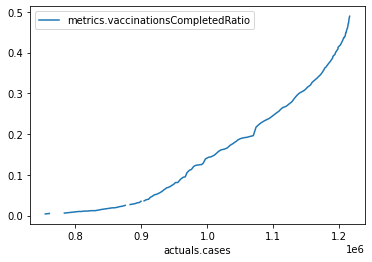

In [54]:
#scatter plot
df2.plot(kind='line',x='actuals.cases',y='metrics.vaccinationsCompletedRatio')
plt.show()

In [28]:
!pip install us

     |████████████████████████████████| 132 kB 6.9 MB/s 
  Created wheel for us: filename=us-2.0.2-py3-none-any.whl size=11945 sha256=ad0d7450636398cd9ac32d376836c574ba18bbb07bd0eb9c4e068a696b599135
  Stored in directory: /root/.cache/pip/wheels/ca/6b/11/cda9ea2438f721330a35c9a2c8e34b4aedcd34c89af48a4d00
  Created wheel for jellyfish: filename=jellyfish-0.6.1-cp37-cp37m-linux_x86_64.whl size=72190 sha256=5cc3bee2b648b80d7c3c77f727f9107eaaeab1a68591b1b7ecc425dd6252c9ee
  Stored in directory: /root/.cache/pip/wheels/a1/99/51/7de469e37cd1b3c763c24394e1ebf1baa2d79e094bf346cf80
Successfully built us jellyfish


In [102]:
# from datetime import datetime

# date_string = 2021-03-16
# print (datetime.date(date_string))


import datetime as dt

d = dt.datetime.strptime("2021-03-16", "%Y-%m-%d")

# Convert datetime object to date object.
d = d.strftime('%y-%m-%d')
# print(d.fromisocalendar)
# print(d.isoformat())
d

'21-03-16'